This is a good paper to read:
http://ilpubs.stanford.edu:8090/917/1/conceptMining-Techrep.pdf

Here are a few others I found
https://link.springer.com/article/10.1007/BF02826953



https://www.sciencedirect.com/science/article/pii/S1532046419300383



https://www.ncbi.nlm.nih.gov/pubmed/31265066


You should also do a review of the current literature and methods/techniques in Concept Extraction. Tackle this as a research project. We'll want to leverage anything we can that's out there, and also not re-make the wheel. Also try to find how Abstract Concepts are defined (and extracted), and any techniques that are used in the NLP domain to tackle that challenge.

Cosine & Cost:
https://arxiv.org/abs/1410.6093

https://medium.com/@adriensieg/text-similarities-da019229c894

https://github.com/adsieg/text_similarity

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://towardsdatascience.com/custom-loss-functions-for-gradient-boosting-f79c1b40466d

https://stackoverflow.com/questions/51657527/implementing-custom-stopping-metrics-to-optimize-during-training-in-h2o-model-di

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('news.csv', delimiter =',')

In [3]:
df.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [4]:
df.shape

(3566, 7)

In [5]:
df.describe()

,Unnamed: 0
count,3566.000000
mean,2455.649748
std,1298.529450
min,0.000000
25%,1473.250000
50%,2496.500000
75%,3569.750000
max,4608.000000


#### Dropping unwanted columns

In [5]:
df.drop(["Unnamed: 0",'publish_date','url'], axis = 1, inplace = True)

In [6]:
df.head()

,authors,title,description,text
0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...
1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...
2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...
3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...
4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...


In [7]:
df['authors'] = df['authors'].str.strip('[]')
df['authors'] = df['authors'].str.strip('  ''')
df['authors'] = df.authors.str.replace("[({':]", "")
df['authors'] = df['authors'].str.lower()

In [8]:
df.head()

,authors,title,description,text
0,cbc news,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...
1,cbc news,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...
2,the associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...
3,cbc news,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...
4,cbc news,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...


In [9]:
df['authors'].nunique()

261

In [10]:
df['authors'].unique()

array(['cbc news', 'the associated press',
       'mark gollom is a toronto-based reporter with cbc news. he covers canadian, u.s. politics, current affairs.',
       'thomson reuters',
       'leah hendry is a tv, radio, online journalist with cbc montreal investigates. contact her via our confidential tipline, or on email at montrealinvestigates cbc.ca., follow leah on twitter',
       'reporter, web writer for cbc saskatoon, story tips, ideas welcomed at guy.quenneville cbc.ca, follow guy on twitter',
       'jorge barrera is a caracas-born, award-winning journalist who has worked across the country, "internationally. he works for cbcs indigenous unit based out of ottawa. follow him on twitter", jorgebarrera or email him jorge.barrera cbc.ca., follow, jorgebarrera on twitter',
       'colleen m. flood is director of the centre for health law, policy, ethics, university research chair at the university of ottawa.',
       'producer, cbc news business, james dunne researches, produces

#### Cleaning Authors Column

In [11]:
import re

df['authors'].replace(to_replace = [r'cbcs?\b.*',r'.*\bcbcs?', r'.*cbcnews.*'], value='cbc', regex=True, inplace=True)
df['authors'].replace(to_replace = ['the associated press'], value='associated press', inplace=True)
df['authors'].replace(to_replace = [r'canadian?\b.*',r'.*\bcanadian?'], value='canadian', regex=True, inplace=True)
df['authors'].replace(to_replace = [r'freelancer?\b.*',r'.*\bfreelancer?'], value='freelancer', regex=True, inplace=True)


In [12]:
df['authors']

0                                                     cbc
1                                                     cbc
2                                        associated press
3                                                     cbc
4                                                     cbc
5                                                     cbc
6                                                     cbc
7                                        associated press
8                                         thomson reuters
9                                                     cbc
10                                                    cbc
11                                                    cbc
12      colleen m. flood is director of the centre for...
13                                                    cbc
14                                                    cbc
15                                                    cbc
16                                                       
17            

In [13]:
df['authors'].nunique()

36

## Explore the dataset

In [14]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 3566 rows and 4 columns


In [15]:
# How many News Authors are there? Considering Authors as Label.

print("Out of {} rows, {} are CBC News, {} are Associated Press".format(len(df),
                                                       len(df[df['authors']=='Cbc News']),
                                                       len(df[df['authors']=='The Associated Press'])))

Out of 3566 rows, 0 are CBC News, 0 are Associated Press


In [16]:
# How much missing data is there?

print("Number of null in label: {}".format(df['authors'].isnull().sum()))
print("Number of null in text: {}".format(df['text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


## NLP Basics: Implementing a pipeline to clean text

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes. These would be loaded to machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. **Lemmatize/Stem**

In [17]:
df.head()

,authors,title,description,text
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...


### Remove punctuation

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [20]:
df['body_text_clean'] = df['text'].apply(lambda x: remove_punct(x))

In [21]:
df.head()

,authors,title,description,text,body_text_clean
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...


### Tokenization

In [22]:
import re

In [23]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [24]:
df['body_text_tokenized'] = df['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [25]:
df.head()

,authors,title,description,text,body_text_clean,body_text_tokenized
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ..."


### Remove stopwords

In [26]:
import nltk

#from nltk.corpus import stopwords
#stopwords.words('english')

In [27]:
stopword = nltk.corpus.stopwords.words('english')

In [28]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [30]:
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [31]:
df.head()

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo..."


## Supplemental Data Cleaning: Using Stemming

In [32]:
import nltk

ps = nltk.PorterStemmer()   # Test out Porter stemmer

In [33]:
# dir(ps)

* Examples

In [34]:
#print(ps.stem('grows'))
#print(ps.stem('growing'))
#print(ps.stem('grow'))

In [35]:
#print(ps.stem('run'))
#print(ps.stem('running'))
#print(ps.stem('runner'))

### Stem text

In [36]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [37]:
df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))

In [38]:
df.head()

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove...","[scientist, around, world, race, find, novel, ..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo...","[, trudeau, say, rule, quarantin, act, enforc,..."


In [40]:
#df.groupby(['authors']).sum()

### Supplemental Data Cleaning: Using a Lemmatizer

In [48]:
# nltk.download()
import nltk

wn = nltk.WordNetLemmatizer()   # https://wordnet.princeton.edu/
ps = nltk.PorterStemmer()

In [49]:
#dir(wn)

* Examples

In [50]:
#print(ps.stem('meanness'))
#print(ps.stem('meaning'))

In [51]:
#print(wn.lemmatize('meanness'))
#print(wn.lemmatize('meaning'))

In [52]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [53]:
df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [54]:
df.head(5)

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe...","[canadian, pharmacy, limiting, much, medicatio..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor...","[yukon, government, identified, two, place, wh..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,...","[senate, late, wednesday, passed, unparalleled..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove...","[scientist, around, world, race, find, novel, ...","[scientist, around, world, racing, find, novel..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo...","[, trudeau, say, rule, quarantin, act, enforc,...","[, trudeau, say, rule, quarantine, act, enforc..."


In [55]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re


In [56]:
import nltk
from nltk import FreqDist

In [57]:
import spacy

C:\Users\pooja\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable


In [58]:
import gensim
from gensim import corpora

C:\Users\pooja\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [60]:
import pyLDAvis
import pyLDAvis.gensim

In [61]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

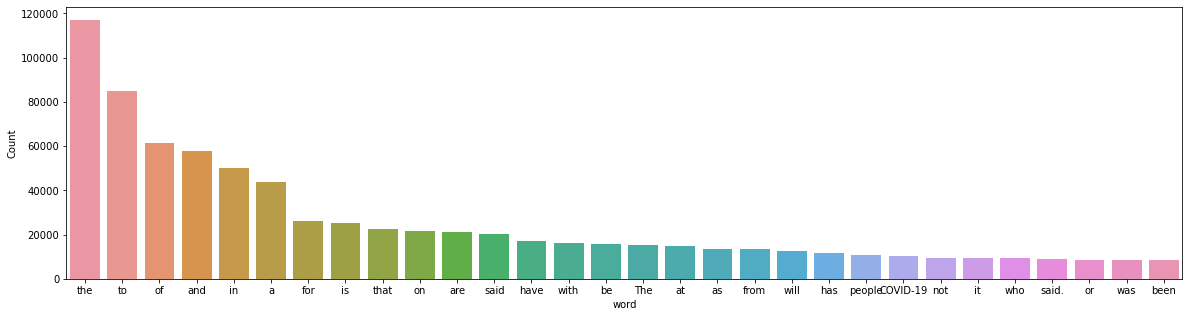

In [62]:
freq_words(df['text'])

In [63]:
# remove unwanted characters, numbers and symbols
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

In [64]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [65]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

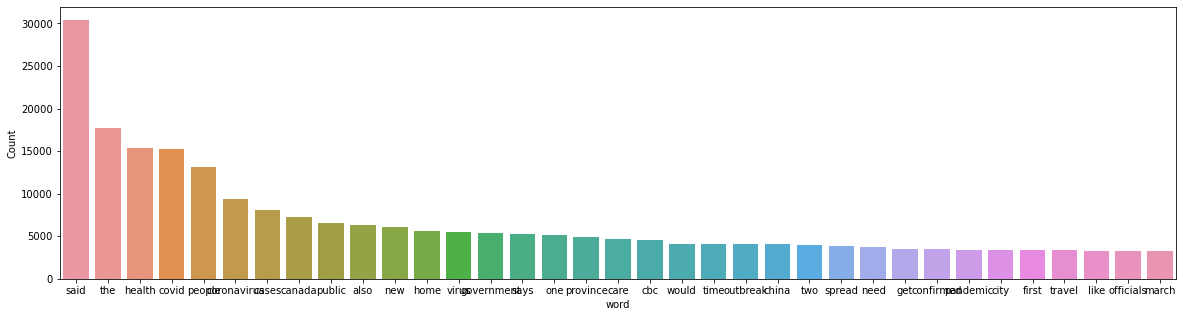

In [66]:
freq_words(reviews, 35)

In [135]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [70]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['the', 'yukon', 'government', 'identified', 'two', 'places', 'whitehorse', 'church', 'dental', 'clinic', 'people', 'may', 'exposed', 'coronavirus', 'recent', 'weeks', 'news', 'release', 'thursday', 'evening', 'government', 'said', 'anybody', 'went', 'either', 'place', 'certain', 'days', 'monitor', 'symptoms', 'may', 'indicate', 'covid', 'fever', 'cough', 'difficulty', 'breathing', 'days', 'call', 'symptoms', 'develop', 'the', 'possible', 'sources', 'exposure', 'sunday', 'morning', 'services', 'bethany', 'church', 'alaska', 'highway', 'march', 'march', 'church', 'kids', 'zone', 'march', 'elias', 'dental', 'clinic', 'march', 'march', 'according', 'news', 'release', 'places', 'visited', 'dates', 'person', 'persons', 'tested', 'positive', 'covid', 'also', 'says', 'people', 'attended', 'places', 'identified', 'times', 'need', 'self', 'isolate', 'long', 'remain', 'healthy', 'develop', 'symptoms', 'the', 'risk', 'individuals', 'possible', 'exposures', 'low', 'release', 'says', 'bethany', 'ch

In [71]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

NameError: name 'lemmatization' is not defined

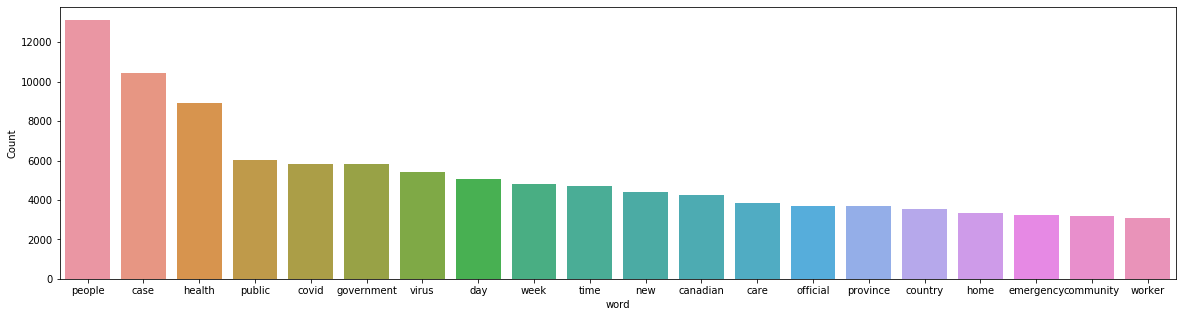

In [88]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 20)

In [89]:
dictionary = corpora.Dictionary(reviews_2)

In [90]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [91]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [92]:
lda_model.print_topics()

[(0,
  '0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"year" + 0.007*"thing"'),
 (1,
  '0.030*"canadian" + 0.019*"country" + 0.018*"flight" + 0.018*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.011*"virus" + 0.011*"case"'),
 (2,
  '0.026*"store" + 0.021*"mask" + 0.018*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.010*"customer" + 0.009*"product" + 0.009*"bus"'),
 (3,
  '0.061*"student" + 0.056*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"online" + 0.009*"teacher"'),
 (4,
  '0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.015*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"'),
 (5,
  '0.026*"government" + 0.015*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"provin

In [93]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.064437  0.054881       1        1  32.111732
5     -0.022986  0.014688       2        1  19.477907
0     -0.066309 -0.009306       3        1  13.997709
1      0.094019  0.029984       4        1  13.160658
6      0.259814 -0.009774       5        1   9.487373
2     -0.112200  0.168592       6        1   7.167403
3     -0.087902 -0.249066       7        1   4.597220, topic_info=            Term         Freq         Total Category  logprob  loglift
537       school  2337.000000   2337.000000  Default  30.0000  30.0000
1153     student  1947.000000   1947.000000  Default  29.0000  29.0000
80          case  9850.000000   9850.000000  Default  28.0000  28.0000
9       canadian  4200.000000   4200.000000  Default  27.0000  27.0000
29    government  5918.000000   5918.000000  Default  26.0000  26.0000
...          ...          ...           ...      ...      ...      ...
50        people   222.707550  12566.091797   Topic7  -4.9589  -0.9532
845         work   171.446152   2275.750000   Topic7  -5.2205   0.4939
522     province   169.051132   3619.389648   Topic7  -5.2346   0.0159
135         care   169.558502   3908.875488   Topic7  -5.2316  -0.0581
59        public   155.225113   6036.913574   Topic7  -5.3199  -0.5811

[580 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4004      4  0.023450  activist
4004      5  0.961459  activist
595       1  0.987278     acute
595       5  0.008092     acute
2776      4  0.988148   african
...     ...       ...       ...
846       1  0.098152     young
846       3  0.365841     young
846       4  0.167305     young
846       5  0.057999     young
846       7  0.310072     young

[1336 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 2, 7, 3, 4])

### Finding synonms using wordnet

In [75]:
top_10 =['people','case','public','health','covid','government','virus']

In [76]:
from nltk.corpus import wordnet

In [ ]:
print(set(synonyms))

In [174]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("recovering"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        
        
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

In [175]:
print(set(synonyms))

{'find', 'convalesce', 'recoup', 'recovering', 'regain', 'go_back', 'reclaim', 'recuperate', 'recover', 'convalescent', 'retrieve'}


In [147]:
print(set(antonyms))

set()


In [168]:
word = wordnet.synsets("price") 

In [169]:
print(word[0].name()) 
  
print(word[0].lemmas()[0].name()) 
  
print(word[0].definition()) 
  
print(word[0].examples())

monetary_value.n.01
monetary_value
the property of having material worth (often indicated by the amount of money something would bring if sold)
['the fluctuating monetary value of gold and silver', 'he puts a high price on his services', "he couldn't calculate the cost of the collection"]


#### A Hyponym is a specialisation of a Synset. It can be thought of as a child (or derived) class in inheritance. The function hyponyms() returns an array containing all the Synsets which are Hyponyms of the given Synset:

In [115]:
print(wordnet.synset('government.n.01').hyponyms())

[Synset('ancien_regime.n.01'), Synset('authoritarian_state.n.01'), Synset('bureaucracy.n.02'), Synset('court.n.03'), Synset('downing_street.n.02'), Synset('empire.n.02'), Synset('federal_government.n.01'), Synset('government-in-exile.n.01'), Synset('local_government.n.01'), Synset('military_government.n.01'), Synset('palace.n.02'), Synset('papacy.n.01'), Synset('puppet_government.n.01'), Synset('state.n.03'), Synset('state_government.n.01'), Synset('totalitarian_state.n.01')]


#### A Hypernym is a generalisation of a Synset (i.e. the opposite of a Hyponym). An array containing all Hypernyms of a Synset is returned by hypernyms(): 

In [123]:
print(wordnet.synset('government.n.01').hypernyms()[0].name())

polity.n.02


#### An entailment is an implication.

In [130]:
print(wordnet.synset('buy.v.01').entailments())

[Synset('choose.v.01'), Synset('pay.v.01')]


#### Meronyms and Holonyms represent the part-whole relationship. The meronym represents the part and the holonym represents the whole. 

In [132]:
print(wordnet.synset('bread.n.01').part_holonyms())

[Synset('sandwich.n.01')]


In [134]:
print(wordnet.synset('sandwich.n.01').part_meronyms())

[Synset('bread.n.01')]


In [1]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [2]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [3]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

C:\Users\pooja\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

### Applying punctuation, Tokenization, Remove stopwords, Lemmatization and Stemming

In [58]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
<ipython-input-58-5623926e4425>:3: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', text)


In [64]:
df.head()

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe...","[canadian, pharmacy, limiting, much, medicatio..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor...","[yukon, government, identified, two, place, wh..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,...","[senate, late, wednesday, passed, unparalleled..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove...","[scientist, around, world, race, find, novel, ...","[scientist, around, world, racing, find, novel..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo...","[, trudeau, say, rule, quarantin, act, enforc,...","[, trudeau, say, rule, quarantine, act, enforc..."


### Vectorizing Raw Data

Implemented 3 types of vectorization Models. They are:

1. count Vectorization
2. Bag-Of-words Model (TF-IDF)
3. N-gram Vectorization or Skip Gram

### Count vectorization 

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)  # call the function clean_text. 
X_counts = count_vect.fit_transform(df['text'])

# X_counts is the vectorized version of the data.

print(X_counts.shape)
#print(count_vect.get_feature_names())  # get_feature_names() prints all the unique words that are found in all of the text messages.

# (3566, 31399) : 3566 text messages, across this 3566 text messages there are 31399 unique words.
# It means the document term matrix consists of 3566 rows and 31399 columns.

# Each row : Text message and the column will have unique words of this text message.

# get_feature_names() : means the numbers are names of the columns. We can remove the numbers and change it to names.





(3566, 31399)


In [67]:
# Apply CountVectorizer to smaller sample

data_sample = df[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['text'])
print(X_counts_sample.shape)
#print(count_vect_sample.get_feature_names())

# (20, 2951) : 20 rows and 2951 columns.
# There are new feature names. 
# 
# 
print(count_vect_sample)


(20, 2951)
CountVectorizer(analyzer=<function clean_text at 0x1105b2b00>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)


In [40]:
## The raw data output of the count vector is called as the Sparse Vector.


In [41]:
# Vectorizers output sparse matrices
#Sparse Matrix: A matrix in which most entries are 0. In the interest of efficient storage, 
#    a sparse matrix will be stored by only storing the locations of the non-zero elements.

X_counts_sample

<20x2951 sparse matrix of type '<class 'numpy.int64'>'
	with 7096 stored elements in Compressed Sparse Row format>

In [42]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

# This is the document term Matrix. It has 2951 columns and 20 rows. 
# Values are numbered from 0 to 191 in the columns. 

,0,1,2,3,4,5,6,7,8,9,...,2941,2942,2943,2944,2945,2946,2947,2948,2949,2950
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_counts_df.columns = count_vect_sample.get_feature_names()  # Assigning the feature names to the columns
X_counts_df

,,000,025,026,042,049,057,1,10,100,...,your,youv,yuje,yukon,z,zarychanski,zibi,ziomek,zmiyiwski,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bag Of Words Model

Bag-of-words model:
1.	Count how many times does a word occur in each message (Known as term frequency) (TF)
2.	Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)- (IDF)
3.	Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [97]:
len(df)

3566

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
# Might take awhile...
train_data = df[0:1000]
bow_transformer = CountVectorizer(analyzer=clean_text).fit(train_data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

17331


In [65]:
newstest1 = train_data['text'][3]
#print(newstest1)

In [66]:
bowtest1 = bow_transformer.transform([newstest1])
print(bowtest1)
print(bowtest1.shape)

  (0, 172)	1
  (0, 223)	1
  (0, 332)	1
  (0, 368)	1
  (0, 434)	1
  (0, 645)	2
  (0, 706)	1
  (0, 739)	1
  (0, 777)	1
  (0, 1015)	1
  (0, 1263)	1
  (0, 1710)	1
  (0, 1713)	1
  (0, 1722)	1
  (0, 1751)	2
  (0, 1781)	1
  (0, 1793)	1
  (0, 1857)	1
  (0, 1864)	1
  (0, 1939)	1
  (0, 2026)	2
  (0, 2170)	1
  (0, 2190)	1
  (0, 2193)	1
  (0, 2213)	3
  :	:
  (0, 15848)	4
  (0, 15855)	1
  (0, 16075)	1
  (0, 16176)	4
  (0, 16300)	1
  (0, 16303)	1
  (0, 16319)	2
  (0, 16352)	10
  (0, 16433)	1
  (0, 16460)	1
  (0, 16558)	2
  (0, 16609)	1
  (0, 16700)	1
  (0, 16721)	1
  (0, 16743)	2
  (0, 16778)	1
  (0, 16804)	1
  (0, 16870)	2
  (0, 16910)	1
  (0, 16980)	1
  (0, 17011)	1
  (0, 17021)	2
  (0, 17036)	4
  (0, 17203)	1
  (0, 17269)	2
(1, 17331)


In [131]:

#print(bow_transformer.get_feature_names())
#print(bow_transformer.get_feature_names()[9570])

In [67]:
news_bows = bow_transformer.transform(train_data['text'])

In [68]:
print('Shape of Sparse Matrix: ', news_bows.shape)
print('Amount of Non-Zero occurences: ', news_bows.nnz)

Shape of Sparse Matrix:  (1000, 17331)
Amount of Non-Zero occurences:  260806


In [134]:
sparsity = (100.0 * news_bows.nnz / (news_bows.shape[0] * news_bows.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(news_bows)
tfidf4 = tfidf_transformer.transform(bowtest1)
print(tfidf4)

  (0, 17269)	0.13058072787464675
  (0, 17203)	0.0296249945017847
  (0, 17036)	0.0608861449974719
  (0, 17021)	0.0276023897036252
  (0, 17011)	0.026468178204935924
  (0, 16980)	0.041739948472949276
  (0, 16910)	0.03634719746060934
  (0, 16870)	0.044399747248866445
  (0, 16804)	0.017694428664810868
  (0, 16778)	0.013397644457302273
  (0, 16743)	0.03890585323985886
  (0, 16721)	0.03249554585605943
  (0, 16700)	0.02251463549972901
  (0, 16609)	0.0349787853183564
  (0, 16558)	0.025227955942080483
  (0, 16460)	0.029983397450680554
  (0, 16433)	0.03530198008474523
  (0, 16352)	0.31799164530439683
  (0, 16319)	0.03615701436040493
  (0, 16303)	0.03451465838070459
  (0, 16300)	0.024674975953548815
  (0, 16176)	0.08833841863248833
  (0, 16075)	0.06162151635796847
  (0, 15855)	0.049864965335699736
  (0, 15848)	0.15756705451835676
  :	:
  (0, 2213)	0.16604873998444136
  (0, 2193)	0.020511552193603216
  (0, 2190)	0.017303454619042147
  (0, 2170)	0.033250023634791376
  (0, 2026)	0.024135565049104336


In [70]:
messages_tfidf = tfidf_transformer.transform(news_bows)
print(messages_tfidf.shape)

(1000, 17331)


## Training the model

In [71]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, train_data['authors'])

In [72]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', train_data.authors[3])

predicted: Cbc News
expected: Cbc News


Created a classification to predict CBC News

### Model Evaluation

In [73]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' '' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' ''
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' ''
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' '' '' '' 'Cbc News'
 'Cbc News' 'Cbc News' 'C

In [74]:
from sklearn.metrics import classification_report
print (classification_report(train_data['authors'], all_predictions))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0.80      0.51      0.62       270

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
test_data  = df[1001:]

In [76]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
TF-IDF:
https://github.com/mahmoudparsian/machine-learning-course/tree/master/docs/TF-IDF

## N-gram Vectorization

In [73]:
from nltk.tokenize.punkt import PunktLanguageVars
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import trigrams

In [74]:
df.head(3)

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe...","[canadian, pharmacy, limiting, much, medicatio..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor...","[yukon, government, identified, two, place, wh..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,...","[senate, late, wednesday, passed, unparalleled..."


In [79]:
data = df['body_text_clean'].to_string()

In [80]:
no_specials_string = re.sub('[!#?,.:";]', '', data)

In [78]:
#no_specials_string

In [81]:
p=PunktLanguageVars()
tokens=p.word_tokenize(no_specials_string)

In [82]:
# See the last 10 pairs
for i in range(len(tokens)-30, len(tokens)-1):
    print(tokens[i], tokens[i+1])

in h
h 3563
3563 Its
Its a
a relic
relic of
of a
a bygone
bygone era
era when
when wealthy
wealthy Nova
Nova 3564
3564 Camels
Camels have
have been
been implicated
implicated in
in a
a Middle
Middle Easter
Easter 3565
3565 A
A World
World Health
Health Organizationled
Organizationled group
group of
of expert


In [57]:
word_pairs = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
print(len(word_pairs))

gram2 = set(word_pairs)
print(len(gram2))

# Print 20 elements from gram2
gram2_iter = iter(gram2)
print([next(gram2_iter) for i in range(50)])

31854
19823
[('Isobel', 'Mackenzie'), ('and', 'first'), ('d', '206'), ('more', 'p'), ('1472', 'It'), ('Friday', 'Kraft'), ('Windsor', 'announced'), ('diamond', 'mine'), ('toward', 'the'), ('a', 'hug'), ('3361', 'Canadians'), ('Algonquin', 'First'), ('of', 'phishing'), ('Rosa', 'desperately'), ('The', 'Brewer'), ('anchored', 'just'), ('on', '1588'), ('2333', 'Manitobans'), ('fourthquarter', '2764'), ('ongo', '495'), ('Follow', 'the'), ('manslaughter', 'and'), ('ma', '1970'), ('April', 'is'), ('has', 'added'), ('and', 'vaccines'), ('1882', 'Its'), ('pos', '182'), ('stood', 'shoulder'), ('As', 'country'), ('82', 'A'), ('coronavirus', 'pandemic'), ('call', 'centre'), ('declared', 'a'), ('are', 'working'), ('i', '2799'), ('su', '2128'), ('in', 'Greater'), ('provincial', 'telephone'), ('2894', 'Last'), ('its', 'final'), ('COVID', '3210'), ('The', 'death'), ('since', 'an'), ('Halton', 'Region'), ('1651', 'An'), ('Hes', 'a'), ('to', '1420'), ('Some', 'who'), ('PE', '337')]


In [58]:
gram2 = dict()

# Populate 2-gram dictionary
for i in range(len(tokens)-1):
    key = (tokens[i], tokens[i+1])
    if key in gram2:
        gram2[key] += 1
    else:
        gram2[key] = 1

# Turn into a list of (word, count) sorted by count from most to least

gram2 = sorted(gram2, key=lambda count: count)

# Print top 20 most frequent words
print(gram2[:50])

[('0', 'Canadian'), ('1', '983'), ('1', 'The'), ('1', 'a'), ('1', 'milli'), ('10', '870'), ('10', '874'), ('10', 'Read'), ('10', 'Three'), ('10', 'billion'), ('10', 'cities'), ('10', 'days'), ('10', 'metal'), ('10', 'people'), ('100', 'Calgarians'), ('100', 'Ford'), ('100', 'm'), ('100', 'people'), ('1000', 'In'), ('1000', 'a'), ('1000', '—'), ('100000', 'globa'), ('1001', 'Beverly'), ('1002', 'When'), ('1003', 'The'), ('1004', 'Getting'), ('1005', 'Murray'), ('1006', 'For'), ('1007', 'Prime'), ('1008', 'Youve'), ('1009', 'On'), ('101', 'The'), ('1010', 'Music'), ('1011', 'Youve'), ('1012', 'The'), ('1013', 'Ottawa'), ('1014', 'Alberta'), ('1015', 'The'), ('1016', 'The'), ('1017', 'As'), ('1018', 'Gunmen'), ('1019', 'Provincial'), ('102', 'Starbucks'), ('1020', 'BC'), ('1021', 'CALGARY'), ('1022', 'As'), ('1023', 'Premier'), ('1024', 'Starting'), ('1025', 'After'), ('1026', 'Some')]


In [59]:
b=bigrams(tokens)
[x for x in b]

[('0', 'Canadian'),
 ('Canadian', 'pharmacies'),
 ('pharmacies', 'are'),
 ('are', 'limiting'),
 ('limiting', 'how'),
 ('how', 'much'),
 ('much', 'medi'),
 ('medi', '1'),
 ('1', 'The'),
 ('The', 'Yukon'),
 ('Yukon', 'government'),
 ('government', 'has'),
 ('has', 'identified'),
 ('identified', 'two'),
 ('two', 'places'),
 ('places', '2'),
 ('2', 'The'),
 ('The', 'Senate'),
 ('Senate', 'late'),
 ('late', 'Wednesday'),
 ('Wednesday', 'passed'),
 ('passed', 'an'),
 ('an', 'unparallel'),
 ('unparallel', '3'),
 ('3', 'Scientists'),
 ('Scientists', 'around'),
 ('around', 'the'),
 ('the', 'world'),
 ('world', 'are'),
 ('are', 'racing'),
 ('racing', 'to'),
 ('to', 'find'),
 ('find', '4'),
 ('4', 'Trudeau'),
 ('Trudeau', 'says'),
 ('says', 'rules'),
 ('rules', 'of'),
 ('of', 'Quarantine'),
 ('Quarantine', 'Act'),
 ('Act', 'will'),
 ('will', '5'),
 ('5', 'The'),
 ('The', 'continued'),
 ('continued', 'existence'),
 ('existence', 'of'),
 ('of', 'wildlife'),
 ('wildlife', 'markets'),
 ('markets', 'w

In [60]:
t=trigrams(tokens)
[x for x in t]

[('0', 'Canadian', 'pharmacies'),
 ('Canadian', 'pharmacies', 'are'),
 ('pharmacies', 'are', 'limiting'),
 ('are', 'limiting', 'how'),
 ('limiting', 'how', 'much'),
 ('how', 'much', 'medi'),
 ('much', 'medi', '1'),
 ('medi', '1', 'The'),
 ('1', 'The', 'Yukon'),
 ('The', 'Yukon', 'government'),
 ('Yukon', 'government', 'has'),
 ('government', 'has', 'identified'),
 ('has', 'identified', 'two'),
 ('identified', 'two', 'places'),
 ('two', 'places', '2'),
 ('places', '2', 'The'),
 ('2', 'The', 'Senate'),
 ('The', 'Senate', 'late'),
 ('Senate', 'late', 'Wednesday'),
 ('late', 'Wednesday', 'passed'),
 ('Wednesday', 'passed', 'an'),
 ('passed', 'an', 'unparallel'),
 ('an', 'unparallel', '3'),
 ('unparallel', '3', 'Scientists'),
 ('3', 'Scientists', 'around'),
 ('Scientists', 'around', 'the'),
 ('around', 'the', 'world'),
 ('the', 'world', 'are'),
 ('world', 'are', 'racing'),
 ('are', 'racing', 'to'),
 ('racing', 'to', 'find'),
 ('to', 'find', '4'),
 ('find', '4', 'Trudeau'),
 ('4', 'Trudeau',

In [61]:
five_gram=ngrams(tokens,5)
[x for x in five_gram]

[('0', 'Canadian', 'pharmacies', 'are', 'limiting'),
 ('Canadian', 'pharmacies', 'are', 'limiting', 'how'),
 ('pharmacies', 'are', 'limiting', 'how', 'much'),
 ('are', 'limiting', 'how', 'much', 'medi'),
 ('limiting', 'how', 'much', 'medi', '1'),
 ('how', 'much', 'medi', '1', 'The'),
 ('much', 'medi', '1', 'The', 'Yukon'),
 ('medi', '1', 'The', 'Yukon', 'government'),
 ('1', 'The', 'Yukon', 'government', 'has'),
 ('The', 'Yukon', 'government', 'has', 'identified'),
 ('Yukon', 'government', 'has', 'identified', 'two'),
 ('government', 'has', 'identified', 'two', 'places'),
 ('has', 'identified', 'two', 'places', '2'),
 ('identified', 'two', 'places', '2', 'The'),
 ('two', 'places', '2', 'The', 'Senate'),
 ('places', '2', 'The', 'Senate', 'late'),
 ('2', 'The', 'Senate', 'late', 'Wednesday'),
 ('The', 'Senate', 'late', 'Wednesday', 'passed'),
 ('Senate', 'late', 'Wednesday', 'passed', 'an'),
 ('late', 'Wednesday', 'passed', 'an', 'unparallel'),
 ('Wednesday', 'passed', 'an', 'unparallel'

* 1. Prediction of all the wrods that will follow the certain word in search. 
    ** example : "Government has" is entered. then it would display the list of words that follow the co 

* 2. Plotter chart : 

## Install TensorFlow Library Work Module

In [1]:
import tensorflow as tf

In [2]:
var = 0
def countWords(text):
    v = 0
    for i in text:
        v = v + 1
    print(v)
print(var)

0


In [3]:
words = []

In [36]:
# Stemmed vectors are taken as input. 
# Article size: 5 articles are taken.

articles = df.body_text_stemmed.tolist()
for article in articles:
    for word in article:
        words.append(word)
        
len(words)

1502567

In [37]:
words[1]

'pharmaci'

In [38]:
# Considering only unique words.
words = set(words)

In [39]:
len(words)

31399

In [40]:
vocab_size = len(words) # gives the total number of unique words

In [41]:
vocab_size

31399

In [42]:
word2int = {}
int2word = {}
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [43]:
print(word2int['pharmaci'])
len(words)

30122


31399

In [44]:
dataTF = []

WINDOW_SIZE = 2

# based on the window size, the neighbouring word or context words is considered for the current word.
# So if the window size is 2, the surrounding words which are at a distance of two words from the current word is processed.

for article in articles[0:5]:
    for word_index, word in enumerate(article):
        for nb_word in article[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(article)) + 1] : 
            if nb_word != word:
                dataTF.append([word, nb_word])

In [45]:
dataTF[0:5]

[['canadian', 'pharmaci'],
 ['canadian', 'limit'],
 ['pharmaci', 'canadian'],
 ['pharmaci', 'limit'],
 ['pharmaci', 'much']]

In [46]:
dataTF[0]

['canadian', 'pharmaci']

In [55]:
dataTF[1]

['canadian', 'limit']

In [47]:
#word2int

In [48]:
word2int["canadian"]  # word2int[ data_word[0] ] = word2int["canadian"] = word2int[dataTF[0]]

6994

In [49]:
word2int["pharmaci"]

30122

In [50]:
word2int['covid19']

17536

In [53]:
vocab_size = len(words)
vocab_size

31399

In [56]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)     # Initializing the temp array with Zeros till the vocab size. like [ 0 0 0]
    temp[data_point_index] = 1    # assigning one value to the data point index. 
    return temp
x_train = [] # input word
y_train = [] # output word

In [57]:
for data_word in dataTF:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [63]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
print(x_train.shape, y_train.shape)

# meaning 9272 training points, where each point has 1101 dimensions
# or 9272 rows and each row has 1101 columns. 

(9272, 31399) (9272, 31399)


In [58]:
# Run this in order to make tensor flow placeholder run on the machine
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [65]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [66]:
x

<tf.Tensor 'Placeholder_4:0' shape=(?, 31399) dtype=float32>

In [67]:
y_label

<tf.Tensor 'Placeholder_5:0' shape=(?, 31399) dtype=float32>

In [68]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [69]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [ ]:
# Started at 10.30 AM
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
# 

loss is :  15.396786
loss is :  15.060417
loss is :  14.7789545
loss is :  14.543843
loss is :  14.347865
loss is :  14.184861
loss is :  14.049553
loss is :  13.937419
loss is :  13.8446045
loss is :  13.767849
loss is :  13.704401
loss is :  13.651961
loss is :  13.6086
loss is :  13.572725
loss is :  13.543006
loss is :  13.518352
loss is :  13.497851
loss is :  13.480762
loss is :  13.466468
loss is :  13.454465
loss is :  13.444339
loss is :  13.435751
loss is :  13.428419
loss is :  13.422116
loss is :  13.4166565
loss is :  13.411886
loss is :  13.407679
loss is :  13.403934
loss is :  13.400566
loss is :  13.397502
loss is :  13.3947
loss is :  13.3920965
loss is :  13.389667
loss is :  13.387376
loss is :  13.385196
loss is :  13.383113
loss is :  13.381103
loss is :  13.379161
loss is :  13.377268
loss is :  13.375417
loss is :  13.373605
loss is :  13.371823
loss is :  13.370061
loss is :  13.368324
loss is :  13.366601
loss is :  13.364895
loss is :  13.363197
loss is :  13

In [ ]:
# For Articles = 100, Window Size = 5
# Started at 12.55 AM
# 

In [59]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.74582875  0.7793943   0.07386164  0.15888414 -1.0550942 ]
 [ 0.98273414  0.0811931   0.0202823   0.3914135  -0.6963007 ]
 [ 0.01152561 -0.315974   -0.21288878  0.15460855  0.8525657 ]
 ...
 [-0.5787782   2.55173    -0.3985736   0.58246446  0.26849777]
 [-0.8640642   0.09151337  0.37342748  0.8094642   0.5006471 ]
 [ 2.7362478  -0.53771824 -1.2462976   1.5780292  -0.5305438 ]]
----------
[0.2118817  0.09580352 0.28877154 0.22681047 0.16917028]
----------


In [60]:
vectors = sess.run(W1 + b1)

In [61]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [92]:
# We will now query these vectors with ‘king’, ‘queen’ and ‘royal’
print(int2word[find_closest(word2int['canadian'], vectors)])
print(int2word[find_closest(word2int['pharmaci'], vectors)])
print(int2word[find_closest(word2int['covid19'], vectors)])

packag
disappoint
follow


In [62]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [63]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

 -3.8947728
face -15.572499
anim 1.0498935
analysi -27.109291
market 22.697393
ship 2.409625
1000 16.15856
could 9.423725
critic 33.66415
remot -1.252983
leader 4.5464296
tumult -13.851024
afford -8.124293
entertain -0.89187616
warn -9.086381
forc -7.2234974
cap -25.375395
respiratori -10.305653
toxic 9.459612
10000 33.244785
spong -28.22298
start 24.725822
justin -29.294842
anyth -17.52146
basebal 28.959248
initi 29.42309
addit -10.913372
brief 16.302504
option -16.439035
specialist 28.440205
coronaviru 16.817432
pressur 25.393217
view -2.5587611
ordersanyon -17.755936
six 30.785965
kanopi -1.4266641
dispens 21.57296
deputi 17.981155
equal -1.5556762
blast -10.843041
stress -16.035044
right -19.541338
spiral 18.063726
wish -11.98849
treatment -31.669596
biotech 26.972506
whose -35.80998
alcohol 6.4318314
settl 0.11116588
trick 19.133835
journal 22.785318
suppli 21.73817
work 26.32507
permanent 16.523457
confin 29.671194
break 27.993616
attent -20.050459
appear -5.8178678
600 -9.580401

150000 11.814204
begin -5.1323147
trade -9.847184
sick -3.5123818
cover 31.386969
track -11.5770645
blend 26.81797
mislead 4.4110937
here 22.17565
focus -20.241213
outbreak 3.22317
per 15.683399
base -18.966576
compli 19.06111
14 -16.657051
secur -4.1326256
rheumatoid -36.39707
ill -2.0389738
second 26.279608
cattl 29.944613
whitehors 21.54646
centuryold 8.104972
astronaut -31.792763
broad 28.730446
8 27.615168
4000 5.9088907
unwash -29.632307
includ 15.738359
burden -35.552666
quebec 28.910887
spokesperson 18.724125
prevent -17.98592
april -28.35252
fee 27.535082
deal 5.777824
especi 14.885817
old 29.056107
hurt 10.017166
unclear -1.3694985
request 23.889174
rich 7.2149005
back 33.600864
essenti 29.069126
misinform 10.14035
glove 32.008663
globe 34.785057
encourag -34.277042
parent -3.536217
watch 3.7644677
wasnt -29.145367
expertis 33.435978
prepar 10.283645
despit -0.68040794
herbal 16.936924
propos -13.624949
big -0.78120065
13 21.351345
sanit 2.8905737
famili 7.733819
anyon 31.139

<Figure size 640x480 with 1 Axes>

## Machine learning

The data we have is unsupervised.therefore, we employed the unsupervised Machine Learning Type. 
Deriving the structure from data where we dont know the effect of any of the variables. 

Based on the content of the text, grouping the texts together in distinct folders. 
* Like cbc news text : in one folder.
* Associated Press News text : in second folder
* freelancer news : In 3rd Folder.

##### Unsupervised Learning Technique on News.csv
If the model can identify that these 30 to 40 texts are in regard to symptoms of COVID
and other ones are in regard to economic effects of COVID in certain regions and then we can group them into certain
bundles.

For classification Problems: we use three main performance metrics.
    1. Accuracy = No.of predicted correctly/Total number of observations
    2. Precision = No. of predicted as cbc news that are actually cbc/total no. predicted as cbc
    3. Recall = No. of predicted as cbc news that are actually cbc/ total no. that are actually cbc 

## RandomForestClassifier Attributes & Hyperparameters

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0

### RandomForestClassifier through Cross-Validation

In [45]:
from sklearn.model_selection import KFold, cross_val_score

In [46]:
rf = RandomForestClassifier(n_jobs=-1)
# n_jobs=-1 : By building indiviual decision trees to run in parallel.

In [47]:
k_fold = KFold(n_splits=5)
# Hyperparameter n_splits = so there are 5 subsets. 
# In 1st itertion model will train on first 4 and evaluate the 5th subset.
# In 2nd itertion model will train on 2,3,4,5 and evaluate the 1st subset and so on. ....

In [48]:
df.head()

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove...","[scientist, around, world, race, find, novel, ..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo...","[, trudeau, say, rule, quarantin, act, enforc,..."


In [53]:
# https://www.kaggle.com/washingtongold/fake-vs-real-news/data
# https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26

true = pd.read_csv('True.csv')
false = pd.read_csv('Fake.csv')

In [52]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [54]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [55]:
true['true'] = 1
false['true'] = 0

In [56]:
true.head()

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [57]:
data = pd.concat([true,false])

In [59]:
data

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [60]:
import re
def preprocess_text(sentence):
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence.lower()

In [63]:
data['cleaned'] = data['text'].apply(preprocess_text)

In [64]:
data.head()

,title,text,subject,date,true,cleaned
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters the head of conservative re...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people will be ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters the special counsel investi...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattle washington reuters president donald tr...


In [65]:
corona_news = pd.read_csv('news.csv')

In [66]:
corona_news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [67]:
corona_news['cleaned'] = corona_news['text'].apply(preprocess_text)

In [68]:
corona_news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url,cleaned
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,canadian pharmacies are limiting how much medi...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,the yukon government has identified two places...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,the senate late wednesday passed an unparallel...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,scientists around the world are racing to find...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,trudeau says rules of quarantine act will be ...


In [69]:
list1 = ''.join(data['cleaned'].tolist()).split(' ')

In [70]:
list1
# So this list has the text of true and false news i.e the real news and fake news.

['washington',
 'reuters',
 'the',
 'head',
 'of',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 's',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'fiscal',
 'conservative',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 'in',
 'keeping',
 'with',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 's',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 'face',
 'the',
 'nation',
 'drew',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'trying',
 'to',
 'pass',
 'federal',
 'budget',
 'in',
 'fight',
 'likely',
 'to',
 'be',
 'linked',
 'to',
 'other',
 'issues',
 'such',
 'as

In [71]:
len(list1)

17590589

In [72]:
list1.extend(''.join(corona_news['cleaned'].tolist()).split(' '))

# Now in this list , all the news.csv data is appended.

In [73]:
len(list1)

20110748

In [74]:
unique = pd.Series(''.join(data['cleaned'].tolist()).split(' ')).unique()
# Now in a new variable, we retreive all the unique words of the real and fake news data set.

In [75]:
unique

array(['washington', 'reuters', 'the', ..., 'treehousehere', 'betti',
       'mondoweiss'], dtype=object)

In [76]:
item_to_index = {}
index_to_item = {}
for index,item in enumerate(unique):
    item_to_index[item] = index
    index_to_item[index] = item

In [77]:
def vectorize(text):
    return_list = []
    for word in text.split(' '):
        try:
            return_list.append(item_to_index[word])
        except:
            pass
    return return_list

In [78]:
X = data['cleaned'].apply(vectorize)

# converting the all fake and real news words into vectors.

In [ ]:
# del data : to delete a dataframe

In [92]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [84]:
data = df.copy()

In [85]:
data.head(1)

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe..."


In [86]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [87]:
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['text'].apply(lambda x: count_punct(x))

In [93]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,31389,31390,31391,31392,31393,31394,31395,31396,31397,31398
0,2199,2.5,0.023103,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1528,3.1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5207,3.3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4267,4.6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7404,3.5,0.014863,0.0,0.044166,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['authors'], cv=k_fold, scoring='accuracy', n_jobs=-1)

# Which observations belong to which subsets?
# Scoring metric used here is accuracy.
# 

array([0.48039216, 0.5259467 , 0.5259467 , 0.5483871 , 0.56521739])

In [4]:
df.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


In [5]:
df.text[0]

'Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply chains have been disrupted by the spread of COVID-19. Provincial regulatory colleges are complying with the Canadian Pharmacists Association call to limit the amount of medications given to patients to 30-day\xa0supplies. The goal is to stop people from refilling prescriptions early and to ensure life-saving drugs don\'t run short when supply chains are\xa0vulnerable. Mina Tadrous is a pharmacist and researcher in Toronto who monitors pharmaceutical supplies. He is worried Canadians will start stockpiling drugs after watching what has been unfolding in the U.S. and other regions as the virus spreads.\xa0 He said pharmacists are concerned about drugs such as life-saving inhalers that people might stockpile based on misinformation circulating about potential treatments for COVID-19. "It\'s that 

In [6]:
len(df.text[0])

2593

### Concept Extraction

For news domain : Extract concepts based on symptoms of COVID, concept on sensitive information like drugs from Indoa, China.  supplies on medications.Stock Shortages.

In [7]:
from reach import Reach
from conch import compose

ModuleNotFoundError: No module named 'reach'

In [8]:
from conch.preprocessing.concept_vectors import create_concepts

ModuleNotFoundError: No module named 'conch'

Cosine & Cost: https://arxiv.org/abs/1410.6093

https://medium.com/@adriensieg/text-similarities-da019229c894

https://github.com/adsieg/text_similarity

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://towardsdatascience.com/custom-loss-functions-for-gradient-boosting-f79c1b40466d

https://stackoverflow.com/questions/51657527/implementing-custom-stopping-metrics-to-optimize-during-training-in-h2o-model-di

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html



### Compute the cosine similarity with Python’s scikit learn: Jupyter Notebook.
* https://www.machinelearningplus.com/nlp/cosine-similarity/


In [44]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [45]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()


In [46]:
df.head()

,authors,title,description,text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,cbc,Coronavirus a 'wake-up call' for Canada's pres...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,"[canadian, pharmacies, are, limiting, how, muc...","[canadian, pharmacies, limiting, much, medicat...","[canadian, pharmaci, limit, much, medic, dispe..."
1,cbc,Yukon gov't names 2 possible sources of corona...,The Yukon government has identified two places...,The Yukon government has identified two places...,The Yukon government has identified two places...,"[the, yukon, government, has, identified, two,...","[yukon, government, identified, two, places, w...","[yukon, govern, identifi, two, place, whitehor..."
2,associated press,U.S. Senate passes $2T coronavirus relief package,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,The Senate late Wednesday passed an unparallel...,"[the, senate, late, wednesday, passed, an, unp...","[senate, late, wednesday, passed, unparalleled...","[senat, late, wednesday, pass, unparallel, 22,..."
3,cbc,Coronavirus: The latest in drug treatment and ...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,Scientists around the world are racing to find...,"[scientists, around, the, world, are, racing, ...","[scientists, around, world, racing, find, nove...","[scientist, around, world, race, find, novel, ..."
4,cbc,The latest on the coronavirus outbreak for Mar...,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,Trudeau says rules of Quarantine Act will ...,"[, trudeau, says, rules, of, quarantine, act, ...","[, trudeau, says, rules, quarantine, act, enfo...","[, trudeau, say, rule, quarantin, act, enforc,..."


In [51]:
df_sample_data = df[0:3]

In [52]:
df_sample_data['text']

0    Canadian pharmacies are limiting how much medi...
1    The Yukon government has identified two places...
2    The Senate late Wednesday passed an unparallel...
Name: text, dtype: object

In [53]:
sparse_matrix = count_vectorizer.fit_transform(df_sample_data['text'])

In [54]:
sparse_matrix

<3x734 sparse matrix of type '<class 'numpy.int64'>'
	with 872 stored elements in Compressed Sparse Row format>

In [55]:
# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df_2 = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['Pharmacies', 'government', 'Senate'])

In [56]:
df_2

# This is the document term matrix

,000,10,13,130,14,15,150,16,19,20,...,worldwide,worried,worse,would,written,year,york,you,yukon,zone
Pharmacies,1,0,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,1,0,0
government,0,0,1,0,1,2,0,1,6,0,...,0,0,0,0,0,0,0,0,4,1
Senate,4,1,0,1,0,0,1,0,3,2,...,1,0,1,9,1,1,2,1,0,0


* Use the TfidfVectorizer() instead of CountVectorizer(), because it would have downweighted words that occur frequently across docuemnts.

### Use cosine_similarity() to get the final output. It can take the document term matri as a pandas dataframe as well as a sparse matrix as inputs.

In [57]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_2, df_2))

[[1.         0.55665791 0.6839581 ]
 [0.55665791 1.         0.67215848]
 [0.6839581  0.67215848 1.        ]]


* The similarity scores amongst similar documents are higher

### Soft Cosine Similarity:
* Consider another set of documents on a completely different topic, say Country, you want a similarity metric that gives higher scores for documents belonging to the same topic and lower scores when comparing docs from different topics.

In [ ]:
--- Samples Testing ---

In [49]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

In [50]:
documents

['Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin',
 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election',
 'Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career']

### AWS 

In [ ]:
cd Desktop/SCU/Courses/Capstone/Trash
chmod 400 Mytreyi_Reddy.pem
or
Sudo chmod 400 /Path/Yourkey.pem

ssh -i Mytreyi_Reddy.pem ubuntu@

In [ ]:
chmod 400 Mytreyi_Reddy.pem

ssh -i "Mytreyi_Reddy.pem" ubuntu@ec2-52-53-251-244.us-west-1.compute.amazonaws.com